# BoomBikes Bike Sharing Assignment - Abhijit Majumdar

## Importing required libraries

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

## Reading dataset

In [137]:
#Read the csv file using pandas
bikeshare_df = pd.read_csv(r'D:\Learning\EPGP AI & ML\Study Materials\5. Linear Regression\day.csv')

In [138]:
bikeshare_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [139]:
bikeshare_df.shape

(730, 16)

In [140]:
#checking for nulls in the dataset
bikeshare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [141]:
#all fields above are non-null, checking the fields for non-null
bikeshare_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### There are no null values in the dataset columns

In [142]:

#check the details of numerical data
bikeshare_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [143]:
#size of data
bikeshare_df.size

11680

In [144]:
#data values of the dataset
bikeshare_df.values

array([[1, '01-01-2018', 1, ..., 331, 654, 985],
       [2, '02-01-2018', 1, ..., 131, 670, 801],
       [3, '03-01-2018', 1, ..., 120, 1229, 1349],
       ...,
       [728, '29-12-2019', 1, ..., 159, 1182, 1341],
       [729, '30-12-2019', 1, ..., 364, 1432, 1796],
       [730, '31-12-2019', 1, ..., 439, 2290, 2729]], dtype=object)

## Data Cleansing

In [145]:
#creating calculated field to understand business age
bikeshare_df['bus_age'] = (pd.to_datetime(bikeshare_df['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [146]:
bikeshare_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,bus_age
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [147]:
#Dropping columns that are not required for data analysis
bikeshare_df.drop(['instant'], axis = 1, inplace = True)
bikeshare_df.drop(['dteday'], axis = 1, inplace = True)
bikeshare_df.drop(['casual'], axis = 1, inplace = True)
bikeshare_df.drop(['registered'], axis = 1, inplace = True)

In [148]:
#checking after column removals
bikeshare_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,bus_age
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [149]:
bikeshare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  bus_age     730 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.3 KB


In [150]:
#checking no of values for season types
bikeshare_df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [151]:
#checking no of values for weather situation types
bikeshare_df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [152]:
#checking the correlation
bikeshare_df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,bus_age
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584,0.413587
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728,0.866026
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191,0.498251
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,0.016275
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534,-0.000023
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542,-0.004619
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929,-0.021862
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044,0.150738
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685,0.152773
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543,0.016080


We see that columns like season, mnth, weekday and  weathersit are integers which would make no sense for our EDA

## Checking outliers in dataset

In [153]:
bikeshare_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'bus_age'],
      dtype='object')

In [154]:
#Printing no of unique values in each column
bikeshare_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
bus_age       730
dtype: int64

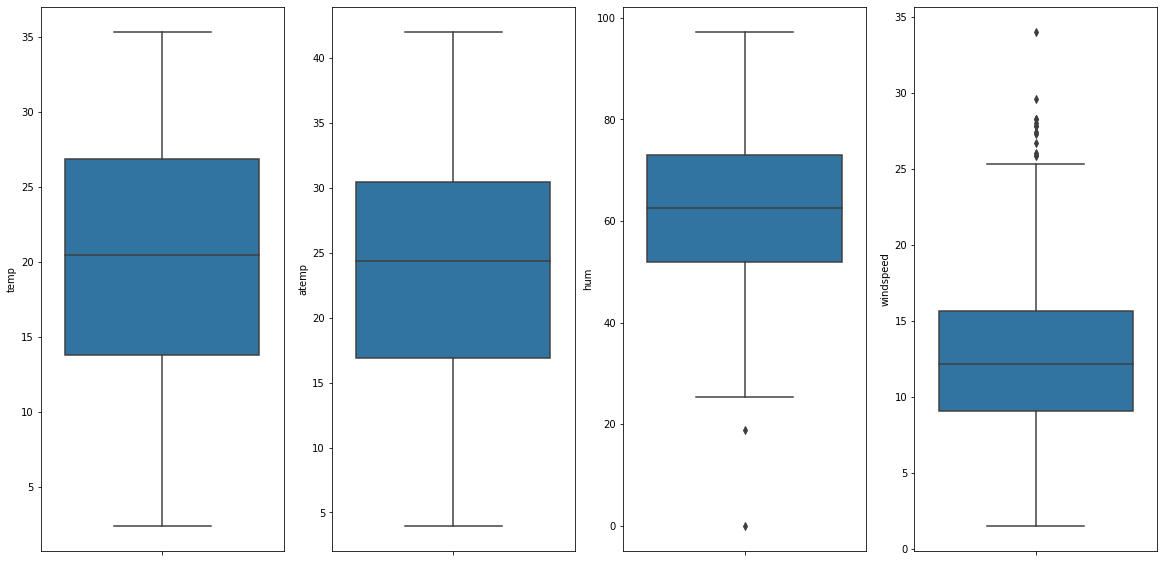

In [103]:
# Drawing box plots for indepent variables with continuous values to check the distribution
cols = ['temp','atemp','hum','windspeed']
plt.figure(figsize=(20,10))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bikeshare_df)
    i+=1

#### There is not much outlier to be handled as the data distribution looks even

## EDA

In [155]:
#Converting season, weathersit, weekday and mnth to categorical values
bikeshare_df.season = bikeshare_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

bikeshare_df.weathersit = bikeshare_df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'})

bikeshare_df.mnth = bikeshare_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bikeshare_df.weekday = bikeshare_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})


In [156]:
bikeshare_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,bus_age
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


#### Drawing pair plots to check the linear relationship

<Figure size 1440x2160 with 0 Axes>

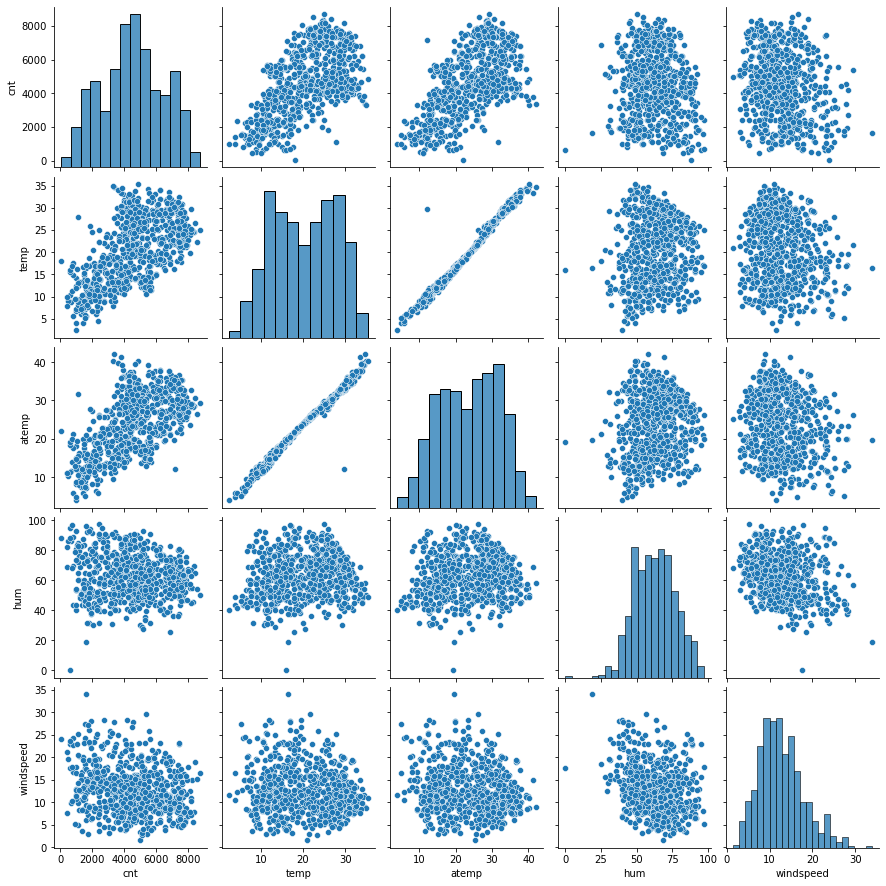

In [157]:
#Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (20,30))
sns.pairplot(data=bikeshare_df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

#### The fields temp and atemp seems to have the highest corelation with the target variable cnt
#### As seen from the correlation map, output variable has a linear relationship with variables like temp, atemp

<Figure size 1440x1080 with 0 Axes>

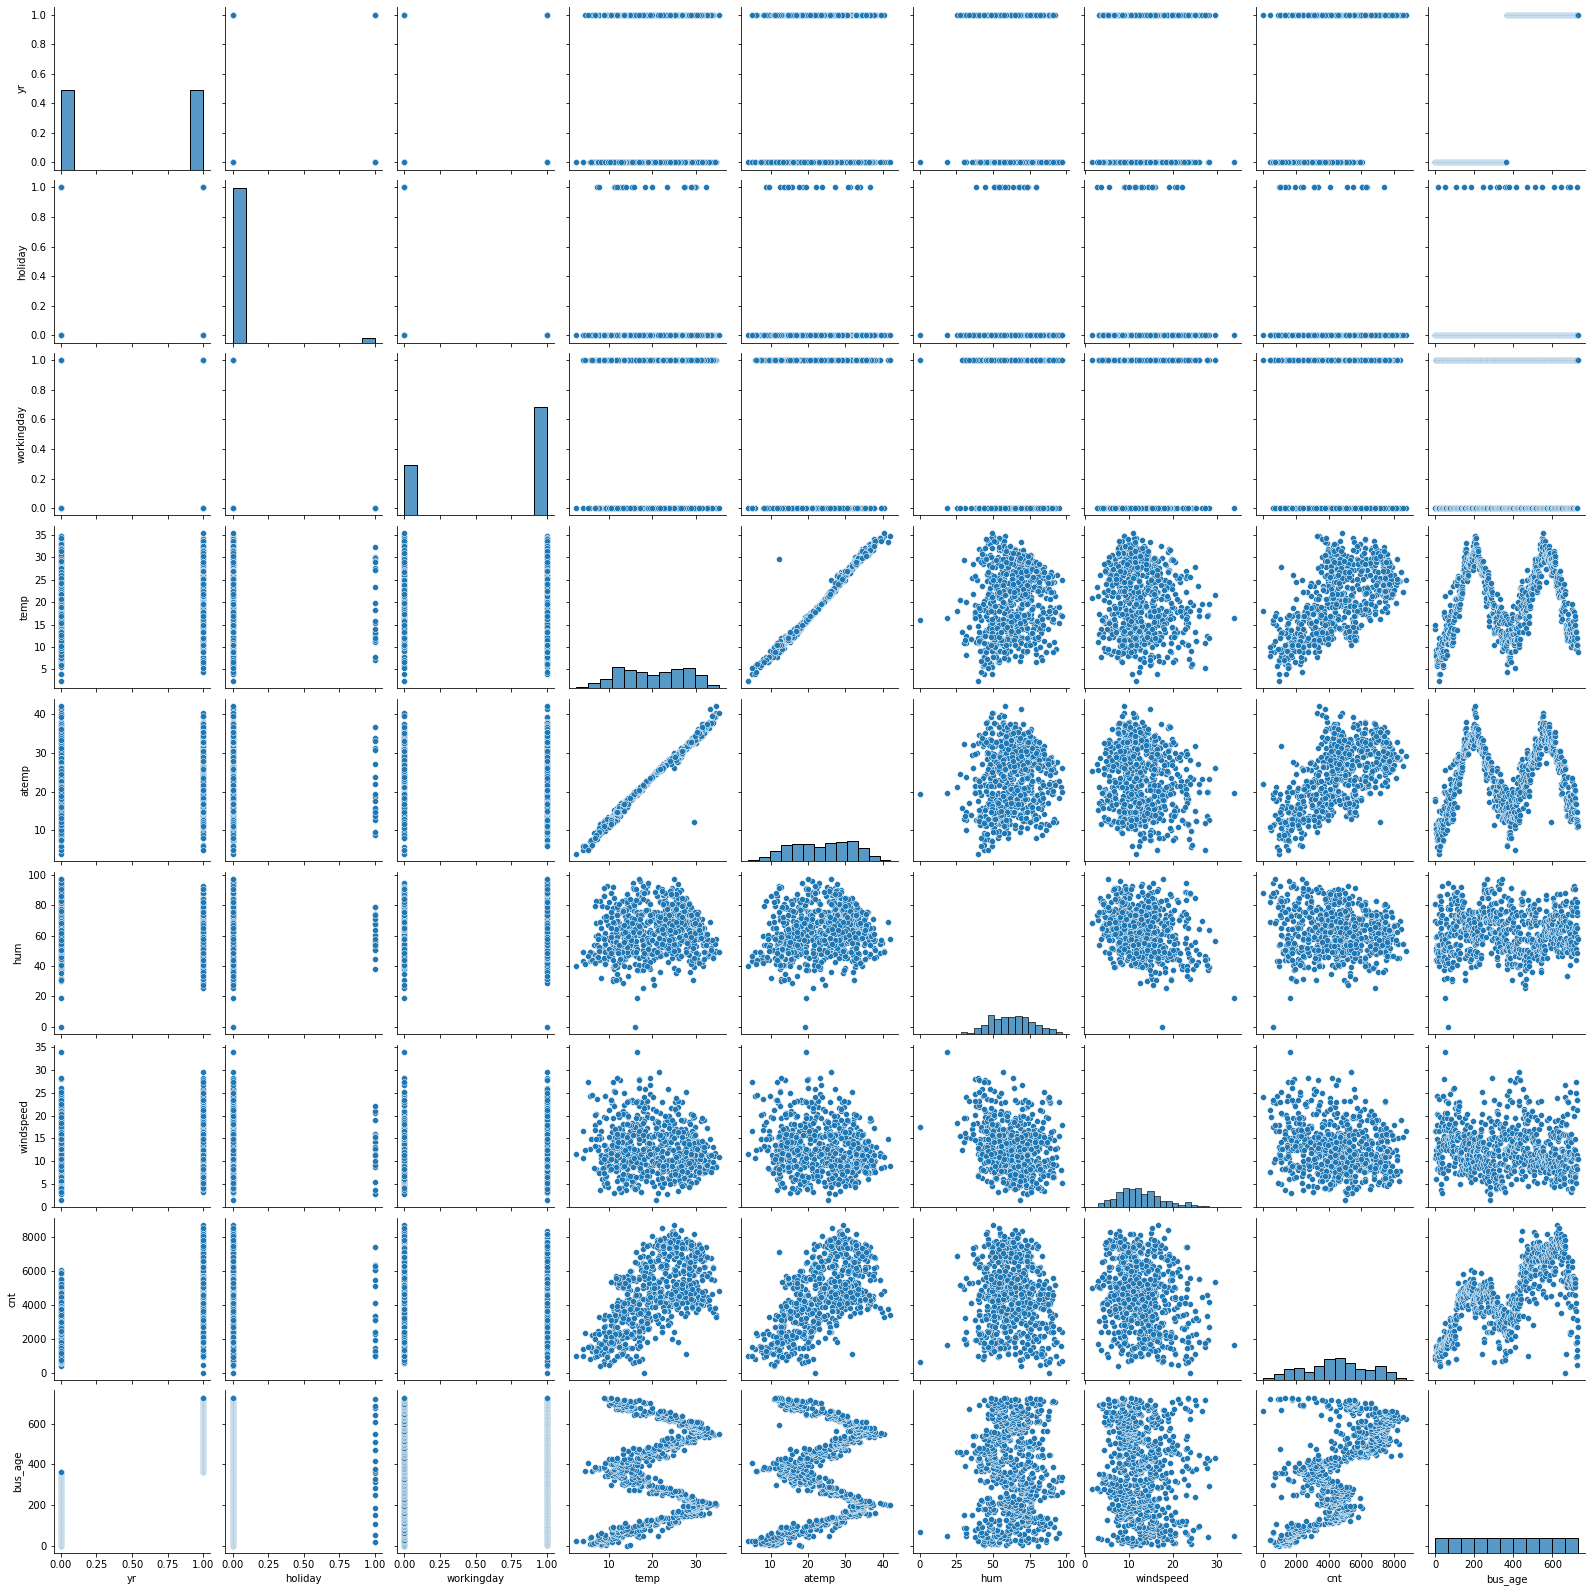

In [158]:
#Visualising the data to find the correlation between the numerical variable
plt.figure(figsize=(20,15))
sns.pairplot(bikeshare_df)
plt.show()

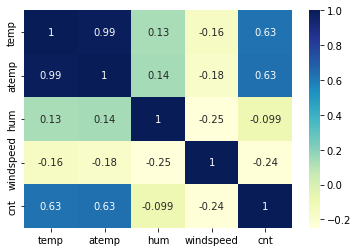

In [159]:
# Checking continuous variables relationship with each other
sns.heatmap(bikeshare_df[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='YlGnBu', annot = True)
plt.show()

#### The fields temp and atemp are highly positively correlated

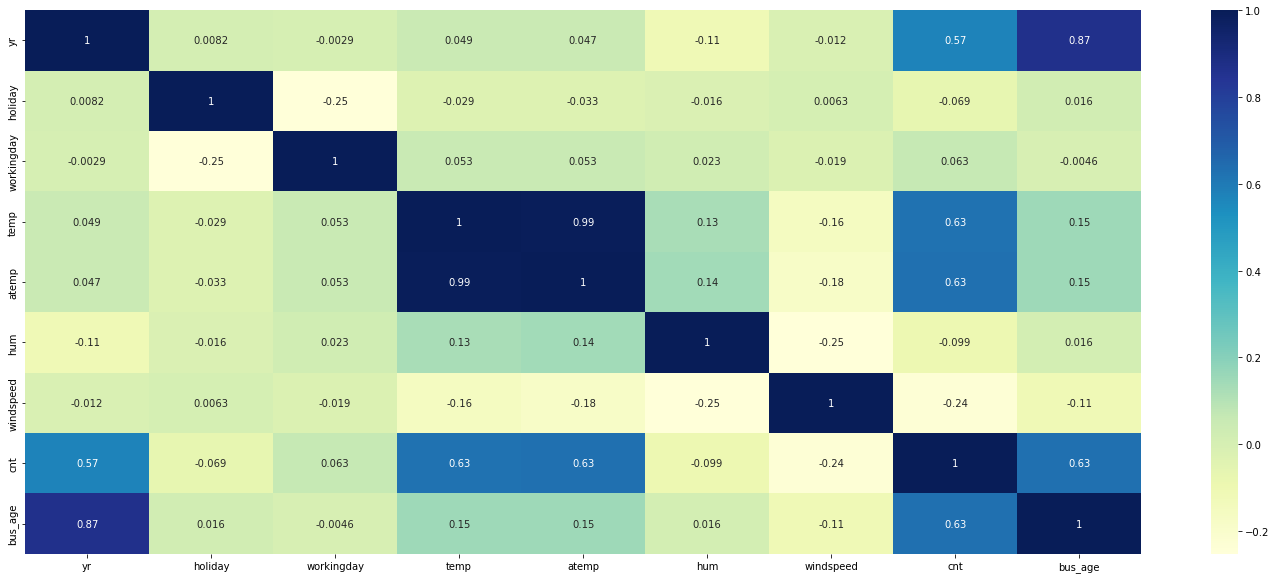

In [160]:
#Correlations for numeric variables
cor=bikeshare_df.corr()
plt.figure(figsize=(25,10))
sns.heatmap(cor, cmap="YlGnBu", annot = True)
plt.show()

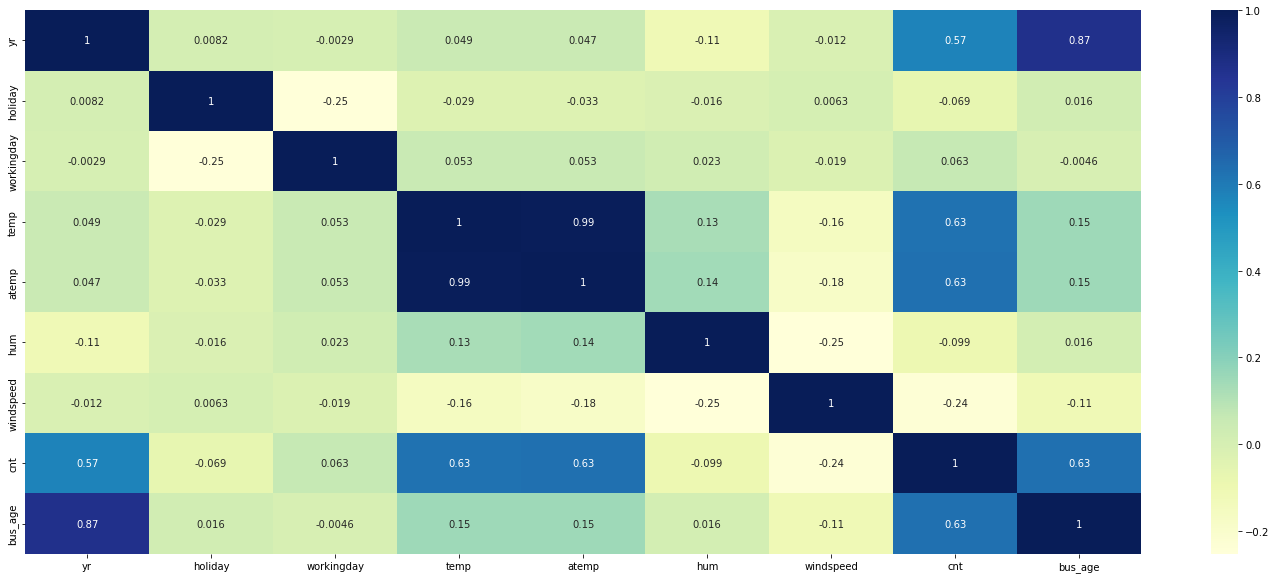

In [161]:
#Calculate Correlation
corr = bikeshare_df.corr()
plt.figure(figsize=(25,10))

#Draw Heatmap of correlation
sns.heatmap(corr,annot=True, cmap='YlGnBu' )
plt.show()

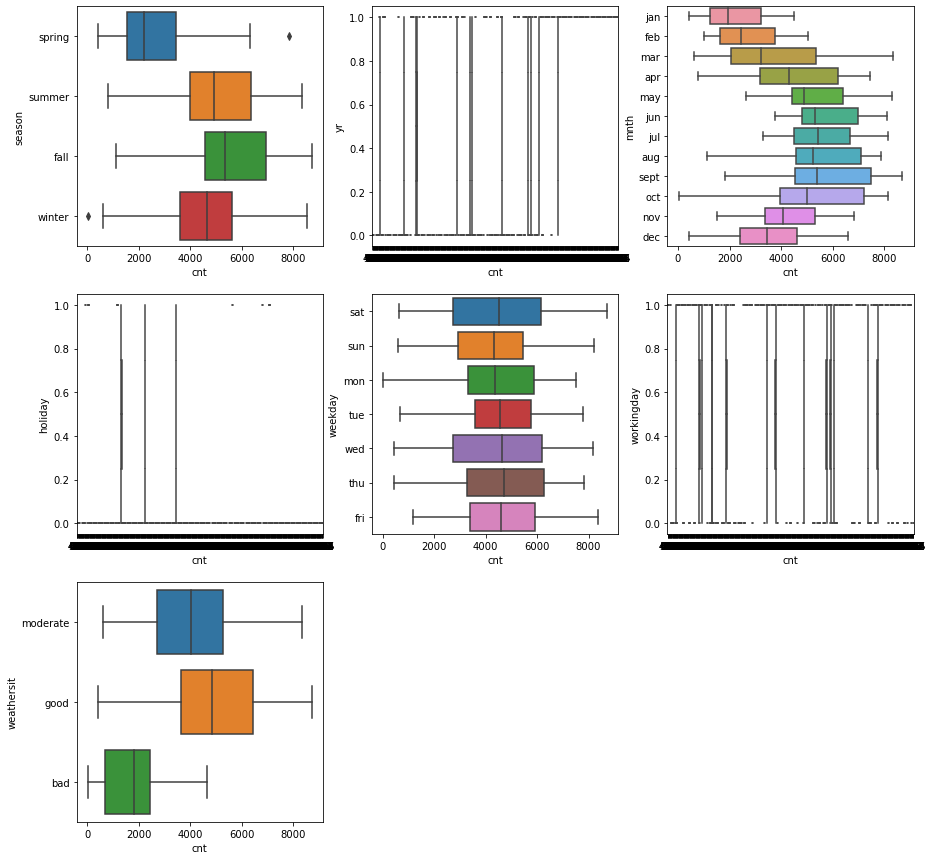

In [162]:
# Boxplot for categorical variables against independent variables to see demands
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    #sns.boxplot(data=bikeshare_df, x=i[1], y='cnt')
    sns.boxplot(data=bikeshare_df, y=i[1], x='cnt')
plt.show()

#### _`Inference`_:
    Here many insights can be drawn from the plots

    1. Season: 3:fall has highest demand for rental bikes
    2. I see that demand for next year has grown
    3. Demand is continuously growing each month till June. September month has highest demand. After September, demand is        decreasing
    4. When there is a holiday, demand has decreased.
    5. Weekday is not giving clear picture abount demand.
    6. The clear weathershit has highest demand
    7. During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme            weather conditions.

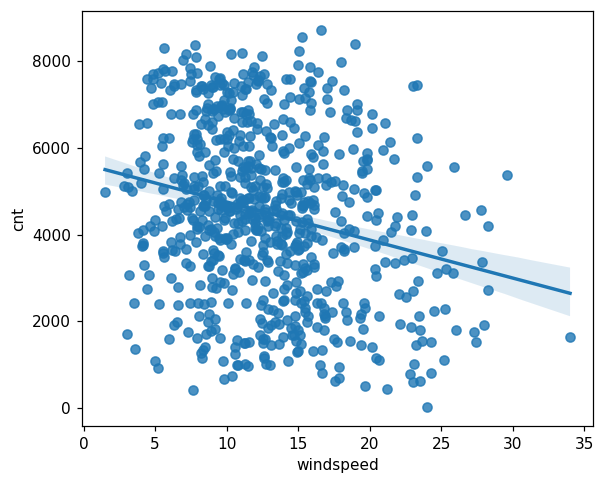

In [163]:
#count vs windspeed study
plt.figure(figsize=(6,5),dpi=110)
sns.regplot(data=bikeshare_df,y="cnt",x="windspeed")
plt.show()

The windspeed values are pretty much scattered around, but we can see a trend that count of bikes reduce with increased windspeed

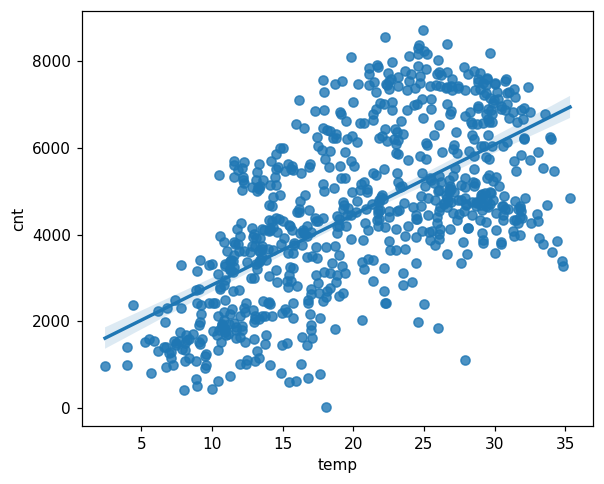

In [164]:
#count vs temperature study
plt.figure(figsize=(6,5),dpi=110)
sns.regplot(data=bikeshare_df,y="cnt",x="temp")
plt.show()

We see that bike's demand is positively correlated to temperature. The count of bikes increases with increase in temperature.

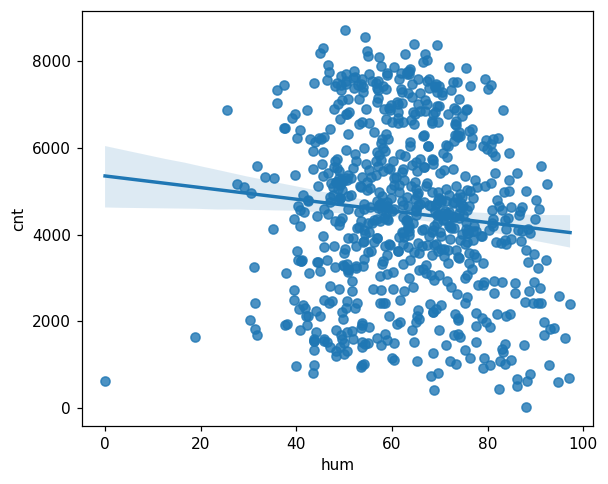

In [165]:
#count vs humidity study
plt.figure(figsize=(6,5),dpi=110)
sns.regplot(data=bikeshare_df,y="cnt",x="hum")
plt.show()

The values of humidity points are more scattered. There is a slight trend of demand reducing with increase in humidity.

## Data preparation for linear regression

In [166]:
#Creating dummy variables for all categorical variables
bikeshare_df = pd.get_dummies(data=bikeshare_df,columns=["season","mnth","weekday"],drop_first=True)

- Dropping the first columns as (p-1) dummies can explain p categories.

In [167]:
#Printing columns after creating dummies
bikeshare_df.columns

Index(['yr', 'holiday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'bus_age', 'season_spring', 'season_summer',
       'season_winter', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'mnth_sept', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed'],
      dtype='object')

In [168]:
bikeshare_df.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,bus_age,...,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
0,0,0,0,moderate,14.110847,18.18125,80.5833,10.749882,985,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,moderate,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,good,8.050924,9.47025,43.7273,16.636703,1349,2,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,good,8.200000,10.60610,59.0435,10.739832,1562,3,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,good,9.305237,11.46350,43.6957,12.522300,1600,4,...,0,0,0,0,0,0,0,0,0,1


In [169]:
bikeshare_df = pd.get_dummies(data=bikeshare_df,columns=["weathersit"])

In [170]:
bikeshare_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'bus_age', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [171]:
bikeshare_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,bus_age,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,1,0,1,0


## Model building for further analysis

### Splitting the data into training and test partitions

In [172]:
bikeshare_df.shape

(730, 32)

In [173]:
#y will contain our target variable, i.e., cnt
y=bikeshare_df.pop('cnt')

#a will contain all other variables
X=bikeshare_df

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [174]:
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,bus_age,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,1,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,1,0,...,0,0,0,0,0,0,1,0,1,0


In [175]:
print(X_train.shape)
print(X_test.shape)

(511, 31)
(219, 31)


### Feature scaling continuous variables

To make all features in same scale to interpret easily

Following columns are continous to be scaled
temp,hum,windspeed

In [176]:
# Importing required library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [177]:
# Let us scale continuous variables
num_vars = ['temp','atemp','hum','windspeed','bus_age']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [178]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,bus_age,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.669276,0.550874,0.526518,0.654174,0.414873,0.512409,0.230920,0.258317,...,0.09002,0.148728,0.150685,0.152642,0.146771,0.131115,0.140900,0.029354,0.624266,0.346380
std,0.500067,0.163398,0.470935,0.227231,0.212976,0.143648,0.185619,0.292268,0.421834,0.438138,...,0.28649,0.356169,0.358092,0.359994,0.354224,0.337857,0.348259,0.168963,0.484786,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.254458,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,0.521262,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,0.770233,0.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [179]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,bus_age,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0.936900,0,0,...,0,0,0,0,1,0,0,0,0,1
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0.884774,0,0,...,0,1,0,0,0,0,0,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0.223594,0,1,...,0,1,0,0,0,0,0,0,1,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0.493827,1,0,...,0,0,0,0,0,1,0,0,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0.877915,0,0,...,0,0,0,0,0,0,1,0,0,1


### Build a Model using RFE and Automated approach

In [180]:
# We will use RFE approach to eliminate some columns
# Build a Linear Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [181]:
#Cut down number of features to 15 using automated approach
rfe = RFE(lr,step=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), step=15)

In [182]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 3),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('bus_age', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 3),
 ('season_winter', True, 1),
 ('mnth_aug', False, 2),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 3),
 ('mnth_jan', True, 1),
 ('mnth_jul', False, 3),
 ('mnth_jun', False, 3),
 ('mnth_mar', False, 3),
 ('mnth_may', False, 3),
 ('mnth_nov', True, 1),
 ('mnth_oct', True, 1),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 3),
 ('weekday_sat', False, 3),
 ('weekday_sun', False, 3),
 ('weekday_thu', False, 3),
 ('weekday_tue', False, 3),
 ('weekday_wed', False, 3),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', False, 3)]

### Manual elimination

In [183]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [184]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [185]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'bus_age', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_nov', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [186]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'season_summer', 'mnth_aug', 'mnth_feb',
       'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_moderate'],
      dtype='object')

In [187]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'temp', 'atemp', 'hum', 'windspeed', 'bus_age', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_nov', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']]

In [188]:
X_train_rfe.shape

(511, 15)

## Build Model 

### Model 1 - Start with all variables selected by RFE

In [189]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr', 'temp', 'atemp', 'hum', 'windspeed', 'bus_age', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_nov', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     166.4
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          2.94e-182
Time:                        18:39:05   Log-Likelihood:                -4133.1
No. Observations:                 511   AIC:                             8298.
Df Residuals:                     495   BIC:                             8366.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3228.7267    358.165     

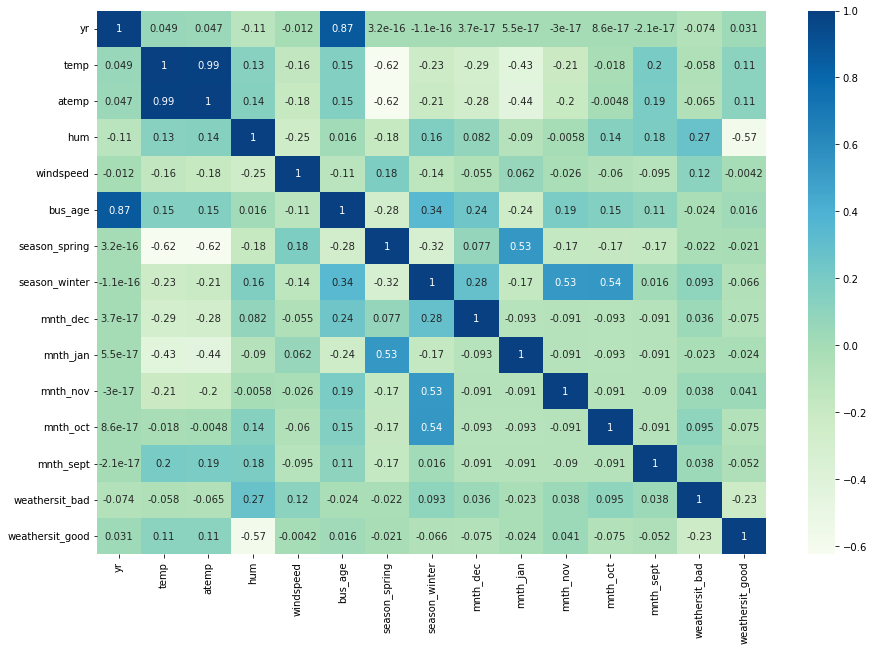

In [190]:
# Checking correlation of features selected by RFE with target column. 
plt.figure(figsize = (15,10))
sns.heatmap(bikeshare_df[['yr', 'temp', 'atemp', 'hum', 'windspeed', 'bus_age', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_nov', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']].corr(), cmap='GnBu', annot=True)
plt.show()

### Model 2

In [194]:
# Dropping the variable atemp as it has high p-value and VIF
cols = ['yr', 'temp', 'hum', 'windspeed', 'bus_age', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_nov', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     178.2
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          3.67e-183
Time:                        19:00:42   Log-Likelihood:                -4133.6
No. Observations:                 511   AIC:                             8297.
Df Residuals:                     496   BIC:                             8361.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3295.0367    352.376     

### Model 3

#### All the columns have p-value > .05 so checking VIFs

In [195]:
# Dropping the variable business age as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_nov', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     188.5
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          1.52e-182
Time:                        19:04:10   Log-Likelihood:                -4137.8
No. Observations:                 511   AIC:                             8304.
Df Residuals:                     497   BIC:                             8363.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3072.5256    346.225     

### Model 4

In [196]:
# Dropping the variable hum as it has high VIF value
cols = ['yr', 'temp', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_nov', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     197.9
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          1.04e-180
Time:                        19:07:33   Log-Likelihood:                -4144.9
No. Observations:                 511   AIC:                             8316.
Df Residuals:                     498   BIC:                             8371.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2123.3656    239.156     

### Model 5

In [198]:
# Dropping the variable weathersit_bad as it has negative coefficient
cols = ['yr', 'temp', 'windspeed', 
       'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_nov', 'mnth_oct',
       'mnth_sept', 'season_spring', 'weathersit_good']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     192.6
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          1.21e-171
Time:                        19:16:06   Log-Likelihood:                -4169.2
No. Observations:                 511   AIC:                             8362.
Df Residuals:                     499   BIC:                             8413.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2016.2168    250.020     

### Model 6

In [202]:
## Dropping the variable season_spring as it has negative coeffecient

cols = ['yr', 'temp', 'windspeed', 
       'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_nov', 'mnth_oct',
       'mnth_sept', 'weathersit_good']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     182.4
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          1.03e-159
Time:                        19:20:06   Log-Likelihood:                -4200.1
No. Observations:                 511   AIC:                             8422.
Df Residuals:                     500   BIC:                             8469.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             792.0944    210.149     

### Model 7

In [203]:
# using the weekend "Sunday" which was dropped during RFE

cols = ['yr', 'temp', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_nov', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good', 'weekday_sun']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     188.2
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          2.22e-182
Time:                        19:22:33   Log-Likelihood:                -4138.2
No. Observations:                 511   AIC:                             8304.
Df Residuals:                     497   BIC:                             8364.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2190.4358    236.982     

### Model 8

In [220]:
# adding mnth_jul, mnth_may and removing mnth_oct and mnth_jan
cols = ['yr', 'temp', 'windspeed', 'season_spring',
       'season_winter', 'mnth_nov', 'mnth_dec',  'mnth_aug',
       'mnth_sept', 'weathersit_good', 'weathersit_moderate', 'weekday_sun','mnth_jul']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     179.3
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          1.05e-183
Time:                        19:39:42   Log-Likelihood:                -4132.3
No. Observations:                 511   AIC:                             8295.
Df Residuals:                     496   BIC:                             8358.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 404.3569    

#### Study analysis
- Here VIF seems to be low and considerable. 
- P-value for all the features is  near to 0.0 and R-square is 0.835 
- We can select Model 8 as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables.
- Difference between R-squared and Adjusted R-squared values for this model is insignificant, which also means that there are no additional parameters that can be removed from this model

In [221]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1


In [222]:
#Let us build the finalmodel using sklearn
cols = ['yr', 'temp', 'windspeed', 'season_spring',
       'season_winter', 'mnth_nov', 'mnth_dec',  'mnth_aug',
       'mnth_sept', 'weathersit_good', 'weathersit_moderate', 'weekday_sun','mnth_jul']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

308.3644688280274 [ 2003.81457334  3518.25482836  -794.59738134 -1299.94943326
   667.48527509  -699.27905599  -605.76724796  -302.7374611
   316.96669677  2231.5027314   1549.29561716  -330.18136156
  -542.74685355]


## Model Evaluation 


In [223]:
# Residual Analysis
y_train_pred = lr.predict(X_train[cols])

In [224]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

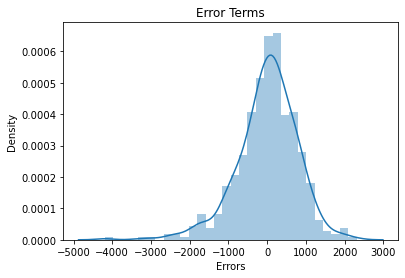

In [225]:
plot_res_dist(y_train, y_train_pred)

#### Errors are normally distribured here with mean 0. So we can move ahead with this model.

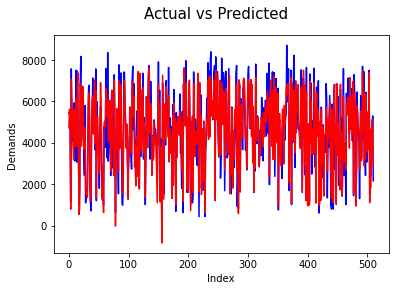

In [226]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

#### Actual and Predicted result shows the pattern is almost overlapping, so we can go ahead with this model

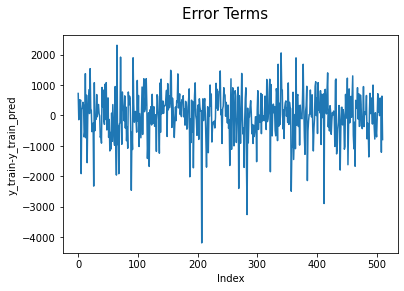

In [227]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

#### The error terms are independent of each other

In [228]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8336961815675119

#### The R-square value is almost same as we received for our model 0.835 v/s 0.834

#### Linearity Check

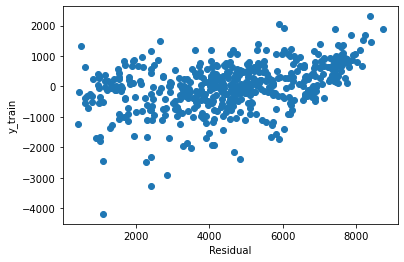

In [229]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

#### Predict values for test data set

In [230]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed','bus_age']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [231]:
#Columns from our final model
cols = ['yr', 'temp', 'windspeed', 'season_spring',
       'season_winter', 'mnth_nov', 'mnth_dec',  'mnth_aug',
       'mnth_sept', 'weathersit_good', 'weathersit_moderate', 'weekday_sun','mnth_jul']

#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

#### R-Squared value for test predictions

In [232]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.8240627836236203

The R2 value of prediction is almost same as the training model

#### Homoscedacity

Text(0, 0.5, 'y_test_pred')

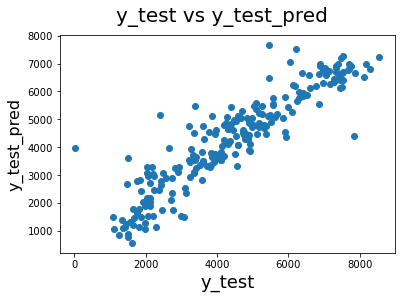

In [233]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_test_pred', fontsize = 16)

#### Observations:
We can observe that variance of the residuals (error terms) is constant across predictions.  i.e error term does not vary much as the value of the predictor variable changes.

#### Plot Test vs Predicted test values

In [234]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              
    plt.xlabel('Index', fontsize=18)                               
    plt.ylabel('Counts', fontsize=16)                              

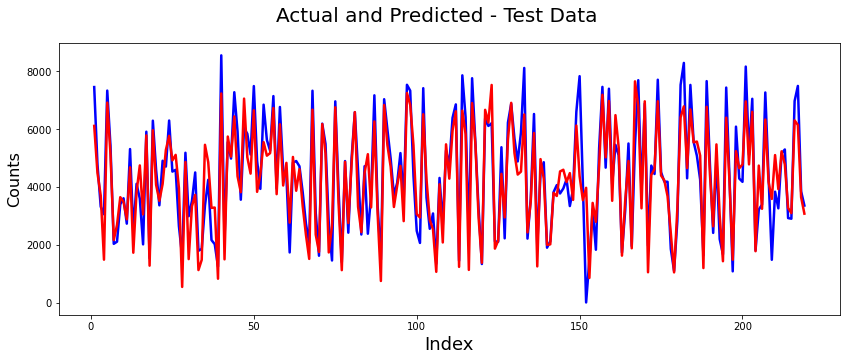

In [235]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

#### Observation:
Predictions for test data is very close to actual values with the overlap

#### Plot Error Terms for test data

In [236]:
# Error terms
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                      # X-label
    plt.ylabel('Counts - Predicted Counts', fontsize=16)                # Y-label

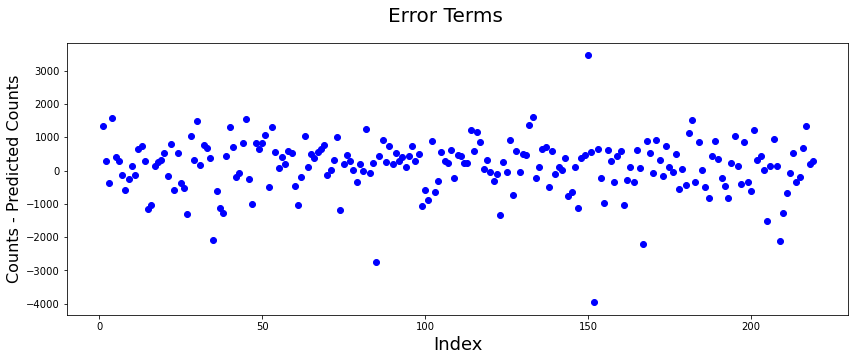

In [237]:
#Plot error terms for test data
plot_err_terms(y_test,y_test_pred)

#### Observations:
The error terms are randomly distributed and there is no particular pattern which means the output is explained well by the model.

### Making Predictions

In [238]:
# Checking data before scaling
bikeshare_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,bus_age,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,1,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,1,0,...,0,0,0,0,0,0,1,0,1,0


#### Intrepretting the Model

In [239]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols = ['yr', 'temp', 'windspeed', 'season_spring',
       'season_winter', 'mnth_nov', 'mnth_dec',  'mnth_aug',
       'mnth_sept', 'weathersit_good', 'weathersit_moderate', 'weekday_sun','mnth_jul']

lm = build_model(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     191.7
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          5.10e-184
Time:                        19:53:07   Log-Likelihood:                -4134.3
No. Observations:                 511   AIC:                             8297.
Df Residuals:                     497   BIC:                             8356.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 308.3645    

### Final Observations

Business observations for BoomBikes
- Boombikes can do more business marketing during July and August months
- Boombikes will have more customer traction in month of September-October and thus should expand business
- Boombikes should focus on the Saturday and Wednesday, when the customer footfall would be higher
- Boombikes should invest in servicing and advertising in Spring season, as it seems to be leaner than Fall(when the business is highest)
- Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019
- There would be less bookings during moderate and bad weather situation
Significant variables to predict the demand for shared bikes
- temp
- hum
- windspeed
- season (Fall, Spring)
- months(July, August, September, November, December)
- Year (2019)
- Saturday, Wednesday, Sunday
- weathersit